In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,ConfusionMatrixDisplay
from tensorflow.keras.lapip install 'tensorflow[and-cuda]'yers import Dense, Dropout
import seaborn as sns

In [3]:
X=np.load("X.npy")
y=np.load("Y.npy")

In [3]:
X_train, X_test, y_train,y_test = train_test_split (X,y,test_size = 0.2 ,random_state = 42)

In [12]:

results={}

In [14]:
def modeloNN (nn):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(nn, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(nn, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(nn, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test)
    train_loss, train_acc = model.evaluate(X_train, y_train)
    results[nn] = {
    "test_loss": test_loss,
    "test_accuracy": test_acc,
    "train_loss": train_loss,
    "train_accuracy": train_acc
}    #  ver pesos

In [19]:
model.summary() # por isto no relatorio #buedas paramentros #temos só 200 imagens 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,938,848 (7.40 MB)

 Trainable params: 646,282 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,292,566 (4.93 MB)

In [15]:
for neurons in range(10, 65):
    nn=neurons
    modeloNN(nn)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7415 - loss: 0.9908
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8186 - loss: 0.6929
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7680 - loss: 0.6781
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8447 - loss: 0.4363
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8383 - loss: 0.6545
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9513 - loss: 0.3035
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8521 - loss: 0.5772
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9377 - loss: 0.2101
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8544 - loss: 0.5180
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9482 - loss: 0.1927
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8254 - loss: 0.6787
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9700 - loss: 0.1346
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8585 - loss: 0.5043
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 

In [13]:
modeloNN(64)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.2690 - loss: 2.0163 - val_accuracy: 0.6562 - val_loss: 0.9588
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7706 - loss: 0.7511 - val_accuracy: 0.7554 - val_loss: 0.7118
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8773 - loss: 0.4300 - val_accuracy: 0.8571 - val_loss: 0.4781
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9300 - loss: 0.2433 - val_accuracy: 0.8886 - val_loss: 0.3844
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9670 - loss: 0.1371 - val_accuracy: 0.8886 - val_loss: 0.4032
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9739 - loss: 0.0981 - val_accuracy: 0.8959 - val_loss: 0.4291
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9812 - loss: 0.0524 - val_accuracy: 0.9031 - val_loss: 0.3632
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9951 - loss: 0.0252 - val_accuracy: 0.8910 - v

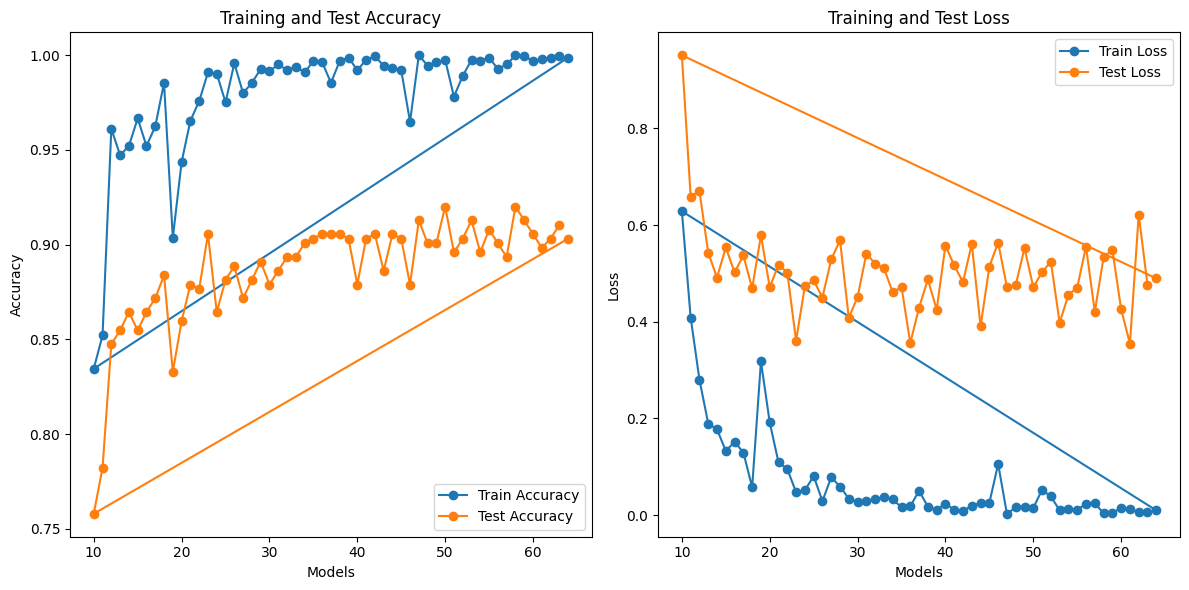

In [16]:
nNeurons = list(results.keys())  
train_accuracy = [results[nne]["train_accuracy"] for nne in nNeurons]
test_accuracy = [results[nne]["test_accuracy"] for nne in nNeurons]
train_loss = [results[nne]["train_loss"] for nne in nNeurons]
test_loss = [results[nne]["test_loss"] for nne in nNeurons]

# Create subplots
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(nNeurons, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(nNeurons, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Número de neurons')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(nNeurons, train_loss, marker='o', label='Train Loss')
plt.plot(nNeurons, test_loss, marker='o', label='Test Loss')
plt.xlabel('Número de neurons')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## com dropout

testar para várias valores de drop out

In [21]:
resultsD={}

In [22]:
X_train, X_test, y_train,y_test = train_test_split (X,y,test_size = 0.2 ,random_state = 42)

In [ ]:
def testarDrop(valorDrop):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,1)), 
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dropout(valorDrop),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test)
    train_loss, train_acc = model.evaluate(X_train, y_train)
    resultsD[valorDrop] = {
    "test_loss": test_loss,
    "test_accuracy": test_acc,
    "train_loss": train_loss,
    "train_accuracy": train_acc
    }

In [24]:
for vdrop in np.arange(0, 1, 0.1):
   testarDrop(vdrop)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8403 - loss: 0.4808
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9847 - loss: 0.0677
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8100 - loss: 0.5563
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9784 - loss: 0.1402
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8189 - loss: 0.5941
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9545 - loss: 0.2544
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8715 - loss: 0.4232
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9868 - loss: 0.0807
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8371 - loss: 0.5144
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9632 - loss: 0.2413
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8616 - loss: 0.4557
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9714 - loss: 0.2120
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7887 - loss: 0.8149
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 

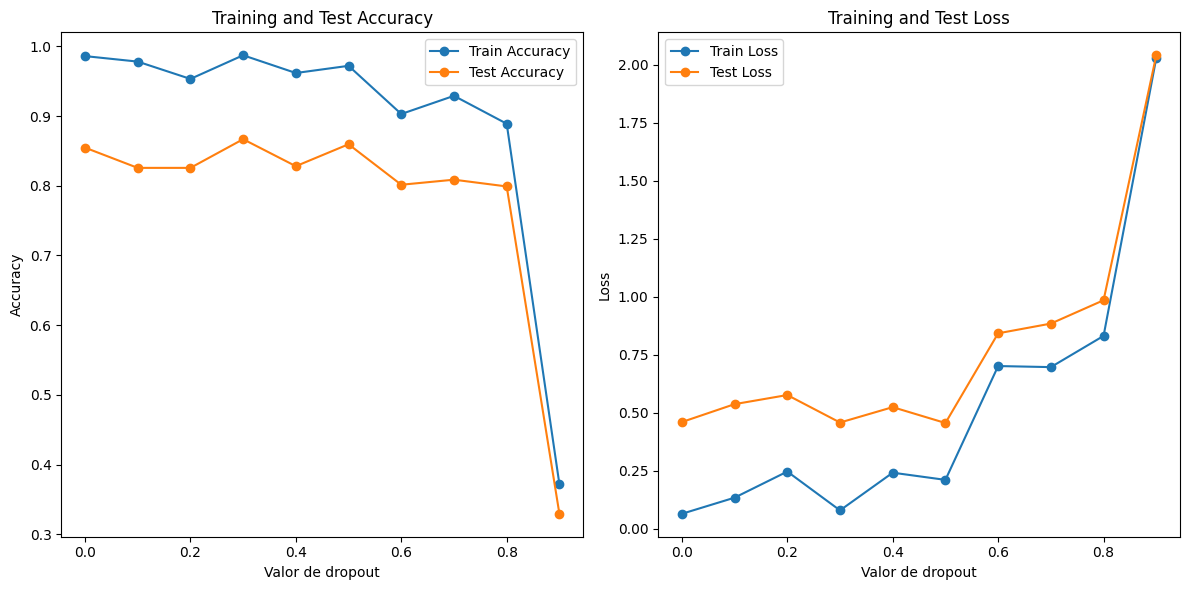

In [25]:
valordrop = list(resultsD.keys())  
train_accuracy = [resultsD[d]["train_accuracy"] for d in valordrop]
test_accuracy = [resultsD[d]["test_accuracy"] for d in valordrop]
train_loss = [resultsD[d]["train_loss"] for d in valordrop]
test_loss = [resultsD[d]["test_loss"] for d in valordrop]

# Create subplots
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(valordrop, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(valordrop, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Valor de dropout')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(valordrop, train_loss, marker='o', label='Train Loss')
plt.plot(valordrop, test_loss, marker='o', label='Test Loss')
plt.xlabel('Valor de dropout')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Rede Simples

In [33]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten

        

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0755 - loss: 2.3055 
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.1101 - loss: 2.3020
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0755 - loss: 2.3055 
Test Accuracy: 0.07748184353113174
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.1101 - loss: 2.3020
Train Accuracy: 0.10612492263317108


In [35]:
resultsR={}

In [38]:
def redeSimples(nn) :
    classifier = Sequential()

    classifier.add(Flatten(input_shape=(64, 64, 1)))
    classifier.add(Dense(nn, activation='relu'))
    classifier.add(Dense(nn, activation='relu')) 
    classifier.add(Dense(10, activation='softmax'))

    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics =['accuracy']) 

    classifier.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),verbose=0)


    train_loss, train_acc = classifier.evaluate(X_train, y_train)
    test_loss, test_acc = classifier.evaluate(X_test, y_test)
    resultsR[nn] = {
    "test_loss": test_loss,
    "test_accuracy": test_acc,
    "train_loss": train_loss,
    "train_accuracy": train_acc
    }

In [39]:
for nn in range(5, 65):
   redeSimples(nn)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0755 - loss: 2.3058 
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.1101 - loss: 2.3019
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0755 - loss: 2.3058 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1643 - loss: 1.9687 
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.2186 - loss: 1.9316
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1643 - loss: 1.9687 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0755 - loss: 2.3053 
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1101 - loss: 2.3020
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0755 - loss: 2.3053 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0755 - loss: 2.3058 
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.1101 - loss: 2.3021
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0755 - loss: 2.3058 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0755 - loss: 2.3057 
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6562 - loss: 1.0383 
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6799 - loss: 0.9731
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - loss: 1.0383 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0755 - loss: 2.3056 
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1101 - loss: 2.3018
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0755 - loss: 2.3056 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5943 - loss: 1.2701 
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6098 - loss: 1.1803
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5943 - loss: 1.2701 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5071 - loss: 1.3365 
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5287 - loss: 1.2863
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5071 - loss: 1.3365 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0755 - loss: 2.3062 
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7061 - loss: 0.8715
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6566 - loss: 0.9935 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7049 - loss: 0.8643 
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7902 - loss: 0.6523
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7049 - loss: 0.8643 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6436 - loss: 1.0037 
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6795 - loss: 0.8772
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6436 - loss: 1.0037 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7321 - loss: 0.7465 
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8093 - loss: 0.6008
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7321 - loss: 0.7465 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7150 - loss: 0.9011 
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7447 - loss: 0.7650
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - ac

In [34]:
classifier.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_23 (Flatten)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 6)                   │          24,582 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 10)                  │              70 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,084 (289.39 KB)

 Trainable params: 24,694 (96.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 49,390 (192.93 KB)

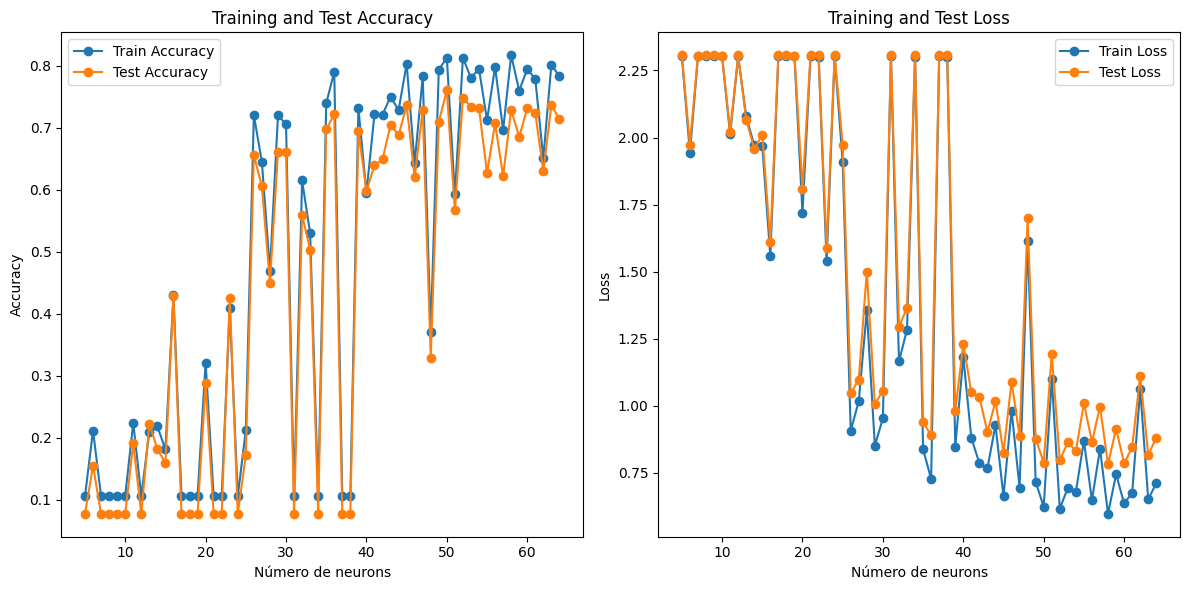

Melhor número de neurons: 50
Resultados: {'test_loss': 0.7886736989021301, 'test_accuracy': 0.7602905631065369, 'train_loss': 0.6235930323600769, 'train_accuracy': 0.8126137256622314}


In [42]:
nNeurons = list(resultsR.keys())  
train_accuracy = [resultsR[nne]["train_accuracy"] for nne in nNeurons]
test_accuracy = [resultsR[nne]["test_accuracy"] for nne in nNeurons]
train_loss = [resultsR[nne]["train_loss"] for nne in nNeurons]
test_loss = [resultsR[nne]["test_loss"] for nne in nNeurons]

# Create subplots
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(nNeurons, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(nNeurons, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Número de neurons')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(nNeurons, train_loss, marker='o', label='Train Loss')
plt.plot(nNeurons, test_loss, marker='o', label='Test Loss')
plt.xlabel('Número de neurons')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#melhor caso
melhor_nn = max(resultsR, key=lambda nn: resultsR[nn]["test_accuracy"])
melhor_resultado = resultsR[melhor_nn]

print(f"Melhor número de neurons: {melhor_nn}")
print(f"Resultados: {melhor_resultado}")